# Prophet

------------
## - 정의

In [1]:
# - 페이스북에서 공개한 시계열 예측 라이브러리
# - 정확도가 높고 빠르며 직관적인 파라미터로 모델 수정이 용이
# - Prophet 모델의 주요 구성 요소 : (1) Trend / (2) Seasonality / (3) Holiday
# - 공식 : y(t) = g(t) + s(t) + h(t) + ϵi

# - g(t) : piecewise linear or logistic growth curve for modelling non-periodic changes in time series
# - s(t) : periodic changes (e.g. weekly/yearly seasonality)
# - h(t) : effects of holidays (user provided) with irregular schedules
# - ϵi: error term accounts for any unusual changes not accommodated by the model

# - Trend를 구성하는 g(t) 함수는 '주기적이지 않은 변화인 트렌드'를 나타내며, 부분적으로 선형 또는 logistic 곡선으로 이루어져 있음.
# - Seasonality인 s(t) 함수는 weekly, yearly 등 '주기적으로 나타나는 패턴'들을 포함
#   Prophet 알고리즘은 푸리에급수(Fourier series)를 이용하여 seasonality 패턴을 추정 (푸리에급수는 주기가 있는 함수를 삼각함수의 급수로 나타낸 것)
# - Holiday를 나타내는 h(t) 함수는 '휴일과 같이 불규칙한 이벤트'들을 나타내며, 만약 특정 기간에 값이 비정상적으로 증가 또는 감소했다면 holiday로 정의하여 모델에 반영할 수 있음.
# - 마지막으로 ϵi는 '정규분포라고 가정한 오차'임

# 사용 데이터셋(train_data)은 '날짜/수치' 컬럼으로 이루어진 데이터프레임 / 지수평활과 비슷한 구조

# 참고 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## - Parameter 설명

### (1) Trend

In [2]:
# ## Trend
# # (1) changepoint_prior_scale 값을 높일수록 changepoint(Trend가 변화하는 지점)를 더 민감하게 감지하지만
# #     값을 너무 높이면 overfitting의 위험이 있음
# # (2) 트렌드가 바뀌는 시점, 즉 '서비스 확대 배포' 또는 '프로모션 등으로 인한 변화 시점'을 알고 있다면
# #     changepoints 파라미터를 추가할 수 있고
# #     n_changepoints로 changepoints 수를 지정할 수 있음
# #     (위의 두 파라미터를 설정해주지 않아도 모델이 자동으로 감지함)

# changepoints             : 트렌드 변화시점을 명시하는 리스트 값
# changepoint_prior_scale  : changepoint의 유연성 조절(default : 0.05)
# n_changepoints           : changepoint의 개수
# changepoint_range        : changepoint 설정 가능 범위(기본적으로 데이터 중 80% 범위 내에서 changepoint를 설정)

### (2) Seasonality

In [3]:
# ## Seasonality
# # (1) seasonality :
# #   - 값을 높여주면 주기 패턴을 더 유연하게 잡아주지만 너무 유연하게 fitting 된 모델은 overfitting 위험이 높음
# #   - daily/weely/yearly seasonality에 대한 파라미터는 제공되지만, monthly는 제공되지 않지만 임의로 seasonality를 정의하여 모델에 반영할 수 있음
# #   - model.add_seasonality(name='monthly', period=30.5, fourier_order=5) / 주기가 30.5일, fourier order가 5인 ‘monthly’라는 명칭의 seasonality를 추가
# # (2) seasonality_mode :
# #   - Additive와 Multiplicative를 잘못 구분하면 오차항을 제대로 분리하지 못하게 됨
# #   - Additive : 데이터의 진폭이 일정함 (Additive Seasonality : Time series = Trend + Seasonality + Error)
# #   - Multiplicative : 데이터의 진폭이 점점 증가하거나 감소함 (Multiplicative Seasonality : Time series = Trend * Seasonality * Error)

# yearly_seasonality       : 연 계절성(default : 10 / 숫자값 또는 False로 조절)
# weekly_seasonality       : 주 계절성(default : 10 / 숫자값 또는 False로 조절)
# daily_seasonality        : 일 계절성(default : 10 / 숫자값 또는 False로 조절)
# seasonality_prior_scale  : 계절성 반영 강도
# seasonality_mode         : 'additive' or 'multiplicative' (default : additive)

### (3) Holiday

In [4]:
# ## Holiday
# # (1) 데이터에 영향을 미치는 '휴일'이나 '프로모션 같은 이벤트'를 알고 있다면 모델에 반영하여 정확도를 높일 수 있음
# # (2) model.add_country_holidays(country_name='국가코드') : 국가 공휴일을 불러올 수 있음(하지만 모든 국가의 공휴일이 있는건 아님)
# # (3) holiday의 정보를 담은 데이터 프레임을 생성
# #     휴일이 휴일 (전/후)에도 영향을 미친다면, 해당 일 수 만큼 파라미터로 설정해 줄 수 있음
# #     예를 들어, 공휴일 영향이 그 다음날에도 영향을 미친다면 lower_window=0, upper_window=1 을 추가해줌
# # [holiday 정의 예시]
# # holiday = pd.DataFrame({'holiday': 'holiday',
# #                         'ds': pd.concat([pd.Series(pd.date_range('2017-05-05', '2017-06-03', freq='D')),
# #                                          pd.Series(pd.date_range('2018-05-05', '2018-06-03', freq='D')),
# #                                          pd.Series(pd.date_range('2019-05-05', '2019-06-03', freq='D')),
# #                                          pd.Series(pd.date_range('2020-05-05', '2020-06-03', freq='D'))])
# #                         lower_window = 0,
# #                         upper_window = 1})
# # [정의한 holiday 적용 예시]
# # m = Prophet(   
# #                 # trend
# #                 changepoint_prior_scale = 0.3,
# #                 # seasonality
# #                 weekly_seasonality = 10,
# #                 yearly_seasonality = 10,
# #                 daily_seasonality = False,
# #                 seasonality_mode = 'multiplicative',
# #                 # holiday
# #                 holidays = holiday,
# #                 holidays_prior_scale = 15
# #             )

# holidays             : 휴일 또는 이벤트 기간을 명시한 데이터프레임
# holiday_prior_scale  : holiday 반영 강도

## - Modeling 예시

In [5]:
# ## [예시 1]
# # 예측 건수 설정
# pred_periods = 100

# # 모델 생성
# model = Prophet()
# model.fit(train_data)

# # 예측 수행
# future = model.make_future_dataframe(periods = pred_periods)
# forecast = model.predict(future)

# # 예측 결과를 시각화
# fig1 = model.plot(forecast)

# # fitting된 모델의 컴포넌트들을 시각화
# fig2 = model.plot_components(forecast)

In [6]:
# ## [예시 2]
# # add_changepoints_to_plot : 모델의 changepoint를 시각화 해보고, changepoint_prior_scale 값 변경에 따른 Trend 변화를 살펴봄
# model = Prophet(
#                     # trend
#                     changepoint_prior_scale=0.3,
#                     n_changepoints=7
#                     changepoint_range=1

#                     # seasonality
#                     yearly_seasonality=20,
#                     weekly_seasonality=10,
#                     daily_seasonality=False,
#                     seasonality_prior_scale = 15,
#                     seasonality_mode = 'multiplicative',
    
#                     # holiday
#                     holidays = holiday,
#                     holidays_prior_scale = 15
# )
# model.fit(train_data)
# future = model.make_future_dataframe(periods = test_cnt)
# forecast = model.predict(future)
# fig = model.plot(forecast)
# a = add_changepoints_to_plot(fig.gca(), model, forecast)  

In [7]:
## * plot의 gca() 관련 설명
# import matplotlib.pyplot as plt
# plt.gca().plot([1,2,3])   # 이전 그림이 없으면 생성
# plt.gca().plot([7,8,9])   # 현재 그림에 그림
# => 현재의 Axes를, gcf()로 현재의 Figure 객체를 구함
#      두 함수는 만약 현재의 Axes나 Figure가 없을 경우 새로 생성함

---------

## 0. 환경설정

In [8]:
import numpy as np
import pandas as pd
import time
import glob
import pickle
import itertools

import seaborn as sns
import matplotlib.pyplot as plt  # from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# !pip install pystan
# !pip install fbprophet

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import ParameterGrid

import warnings
warnings.filterwarnings('ignore')

# 데이터프레임 출력 옵션
pd.set_option('display.max_columns', 100)

#지수표현
pd.options.display.float_format = '{:.5f}'.format

# # 그래프 폰트
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)
# plt.rc('font', family='Malgun Gothic')
# plt.rcParams["figure.figsize"] = (8, 4)
# plt.rcParams['axes.unicode_minus'] = False

## 1. 입력값 기입

In [9]:
# 기본 정보
data_folder = 'data'    # 원본데이터 위치(폴더명)
save_folder = 'result'  # 결과 저장 위치(폴더명)
file_nm = 'ts_data(jena_climate_2009_2016)'  # 원본파일명(csv 파일)
sv_file_nm = 'result_ts_data(jena_climate_2009_2016)'  # 결과파일명(csv 파일)
file_encode = 'utf-8'     # 원본데이터의 encoding
sv_file_encode = 'utf-8'  # 결과데이터의 encoding

In [10]:
# test set 비율 정보 (전체 데이터셋 중 test_per 비율만큼 오차율 계산)
test_per = 0.2

## 2. 데이터 호출 및 전처리

In [11]:
# 데이터 호출 및 필요 컬럼 정리
tot_data = pd.read_csv(data_folder + '/' + file_nm + '.csv', encoding = file_encode)
tot_data.columns = list(pd.Series(list(tot_data.columns)).map(lambda x : x.replace(' ','')))
tot_data = tot_data[['DateTime','T(degC)']]

In [12]:
# # 수정된 날짜 컬럼 생성(tmp)
# dt_hour = tot_data['DateTime'].map(lambda x : x.split(' ')[1].split(':')[0])  # 시
# dt_minute = tot_data['DateTime'].map(lambda x : x.split(' ')[1].split(':')[1])  # 분
# dt_second = tot_data['DateTime'].map(lambda x : x.split(' ')[1].split(':')[2])  # 초
# dt_day = tot_data['DateTime'].map(lambda x : x.split(' ')[0].split('.')[0])  # 일
# dt_month = tot_data['DateTime'].map(lambda x : x.split(' ')[0].split('.')[1])  # 월
# dt_year = tot_data['DateTime'].map(lambda x : x.split(' ')[0].split('.')[2])  # 년
# tot_data['New_DateTime'] = dt_year + '-' + dt_month + '-' + dt_day + ' ' + dt_hour + ':' + dt_minute + ':' + dt_second  # 수정 컬럼 생성
# tot_data['New_DateTime'] = pd.to_datetime(tot_data['New_DateTime'])

# 수정된 날짜 컬럼 생성 : 위와 같은 방식으로 진행해도 됨
tot_data['New_DateTime'] = pd.to_datetime(tot_data['DateTime'])
tot_data = tot_data[['New_DateTime','T(degC)']].rename(columns = {'New_DateTime':'ds','T(degC)':'y'})

# '초' 단위의 날짜 컬럼을 '일' 단위로 변경 : data
tot_data['ds'] = tot_data['ds'].map(lambda x : str(x).split(' ')[0])
tot_data['ds'] = pd.to_datetime(tot_data['ds'])
data = tot_data.groupby('ds').sum().reset_index()

In [13]:
# train data와 test data 분리
test_cnt = int(round((len(data) * test_per),0))  # test set 건수 = 전체 데이터셋 * test_per(비율)
train_data = data[:len(data) - test_cnt].reset_index(drop=True)
test_data = data[-test_cnt:].reset_index(drop=True)

## 3. 모델링

### 3-1. 모델링 전 데이터 탐색

In [14]:
train_data.head(3)

,ds,y
0,2009-01-01,-973.92000
1,2009-01-02,-483.91000
2,2009-01-03,782.74000


In [15]:
test_data.head(3)

,ds,y
0,2015-05-27,1511.83000
1,2015-05-28,1871.53000
2,2015-05-29,2089.57000


Text(0.5, 1.0, 'Plot_2')

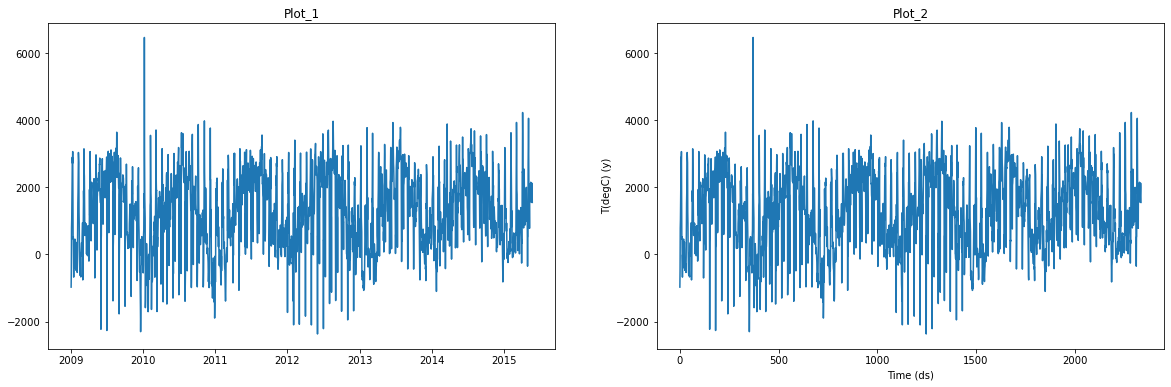

In [16]:
# train_data 그래프 확인
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
plt.plot(train_data['ds'],train_data['y'])
plt.title('Plot_1')

plt.subplot(1,2,2)
plt.plot(train_data['y'])
plt.xlabel('Time (ds)')
plt.ylabel('T(degC) (y)')
plt.title('Plot_2')

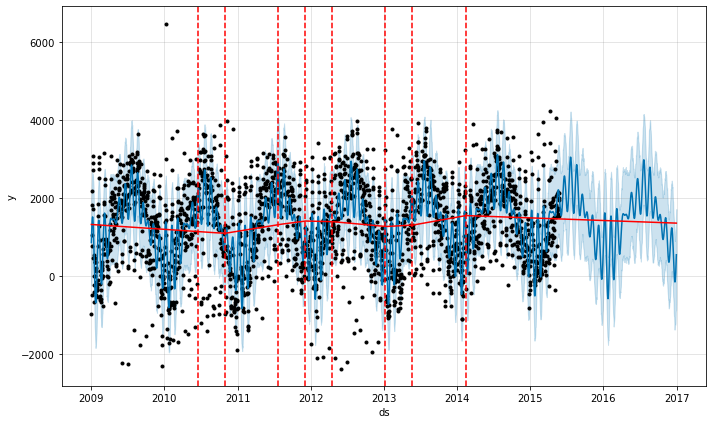

In [17]:
## 파라미터에 따른 결과 확인 : 빨간 실선은 트렌드를 의미하며, 빨간 점선은 트렌드가 변화하는 changepoint 를 의미
model = Prophet(
                    ### Trend
                    # changepoints             # 트렌드 변화시점을 명시하는 리스트 값
                    changepoint_prior_scale = 0.5,  # changepoint의 유연성 조절(default : 0.05)
                    n_changepoints = 14,           # changepoint의 개수
                    # changepoint_range        # changepoint 설정 가능 범위(기본적으로 데이터 중 80% 범위 내에서 changepoint를 설정)

                    ### Seasonality
                    yearly_seasonality = 15,  # 연 계절성(default : 10 / 숫자값 또는 False로 조절)
                    weekly_seasonality = False,  # 주 계절성(default : 10 / 숫자값 또는 False로 조절)
                    daily_seasonality = False,   # 일 계절성(default : 10 / 숫자값 또는 False로 조절)
                    # seasonality_prior_scale = 15,  # 계절성 반영 강도
                    # seasonality_mode = 'multiplicative',  # 'additive' or 'multiplicative' (default : additive)

                    ### Holiday
                    # holidays,                 # 휴일 또는 이벤트 기간을 명시한 데이터프레임
                    # holiday_prior_scale,      # holiday 반영 강도
)
model.fit(train_data)
future = model.make_future_dataframe(periods = test_cnt)
forecast = model.predict(future)
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)  

### 3-2. 모델링 수행

In [18]:
## 모델 생성
model = Prophet(
                    ### Trend
                    # changepoints             # 트렌드 변화시점을 명시하는 리스트 값
                    changepoint_prior_scale = 0.5,  # changepoint의 유연성 조절(default : 0.05)
                    n_changepoints = 14,           # changepoint의 개수
                    # changepoint_range        # changepoint 설정 가능 범위(기본적으로 데이터 중 80% 범위 내에서 changepoint를 설정)

                    ### Seasonality
                    yearly_seasonality = 15,  # 연 계절성(default : 10 / 숫자값 또는 False로 조절)
                    weekly_seasonality = False,  # 주 계절성(default : 10 / 숫자값 또는 False로 조절)
                    daily_seasonality = False,   # 일 계절성(default : 10 / 숫자값 또는 False로 조절)
                    # seasonality_prior_scale = 15,  # 계절성 반영 강도
                    # seasonality_mode = 'multiplicative',  # 'additive' or 'multiplicative' (default : additive)

                    ### Holiday
                    # holidays,                 # 휴일 또는 이벤트 기간을 명시한 데이터프레임
                    # holiday_prior_scale,      # holiday 반영 강도
)
model.fit(train_data)

In [19]:
## 예측 수행
future = model.make_future_dataframe(periods = test_cnt)  # periods = 예측 건수 / freq = 'D' or 'M'
forecast = model.predict(future)  # forecast는 train_data의 시점부터 예측한 test_data의 시점까지를 모두 보여줌

In [20]:
# pred 값
pred = forecast.loc[forecast['ds'].isin(test_data['ds']),['ds','yhat']]
pred.reset_index(drop=True, inplace=True)

# 실제값 / 예측값 / 오차율
result = pd.merge(test_data, pred, how = 'inner')
result['diff_rt'] = ((result['yhat'] - result['y'])/result['y'] * 100)  # 오차율

Text(0, 0.5, 'Diff_rt')

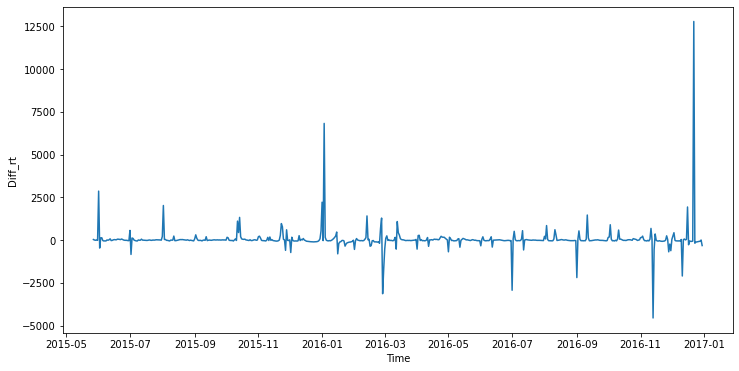

In [21]:
## 오차율 그래프
plt.figure(figsize = (12,6))
plt.plot(result['ds'], result['diff_rt'])
plt.xlabel('Time')
plt.ylabel('Diff_rt')

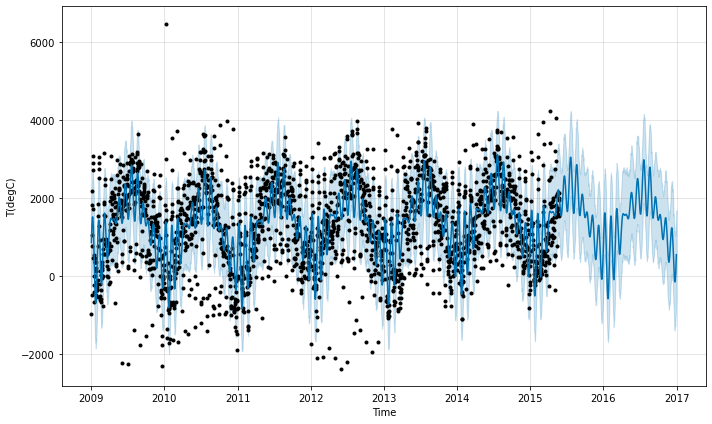

In [22]:
## 예측 결과 시각화
fig1 = model.plot(forecast, xlabel = 'Time', ylabel = 'T(degC)')

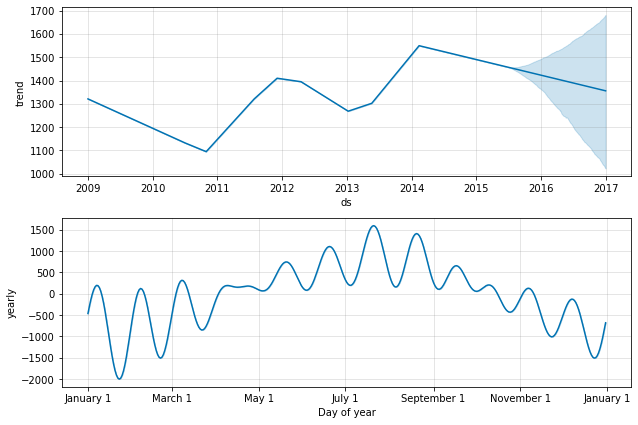

In [23]:
## fitting된 모델의 컴포넌트들을 시각화 (=예측 구성요소 확인)
fig2 = model.plot_components(forecast)

### 3-3. 결과 검증

In [24]:
# ## 교차검증
# # initial : 학습할 구간 / period : 학습한 것을 바탕으로 예측할 구간 / period : cut-off의 간격, train과 val set의 개수를 결정
# from fbprophet.diagnostics import cross_validation
# df_cv = cross_validation(model, initial = '730 days', period = '180 days', horizon = '365 days')

# ## 모형 성능 확인
# from fbprophet.diagnostics import performance_metrics
# df_p = performance_metrics(df_cv)
# df_p.head()

# ## 교차검증 결과 시각화
# from fbprophet.plot import plot_cross_validation_metric
# fig = plot_cross_validation_metric(df_cv, metric = 'mae')